#### What It Does:
##### Backward Elimination starts with all features and iteratively removes one feature at a time based on its impact on model performance.
##### The feature whose removal causes the least degradation in performance is eliminated in each step.



##### Useful:

###### It's a systematic way to identify a subset of features that are most important for your model.
###### It can be computationally expensive but is often effective for datasets with a large number of features.

#### Conceptual Steps:

##### Start with All Features: Begin with all features in your dataset.
##### Evaluate Each Feature Removal: For each feature, remove it temporarily and evaluate the model's performance without that feature.
##### Select the Worst Feature: Choose the feature whose removal leads to the least decrease in model performance (or even an improvement in some cases).
##### Remove from the Set: Permanently remove the selected feature from the dataset.
##### Repeat: Repeat steps 2-4 until you reach a stopping criterion (e.g., desired number of features, a minimum performance threshold, etc.).

#### Mathematical Principle:
Backward elimination aims to minimize a loss function or maximize a performance metric by removing features that contribute the least to the model's predictive power. There's no single mathematical formula, but it involves iteratively evaluating the model's performance after removing each feature. The choice of scoring metric (e.g., accuracy, F1 score, MSE) depends on your problem.

In [1]:
from sklearn.feature_selection import SelectPercentile
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We select MinMaxScaled data, because it gives more accuracy and less loss, despite too little latencycompared to StandardScaling
df = pd.read_csv("C:/Users/DilshodbekMX/PycharmProjects/Cyber/Normalization/MinMaxScaling.csv", low_memory=False)
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [3]:
X = df.drop("Label", axis=1)  # Features
y = df["Label"]

In [4]:
# Store original column names
original_columns = X.columns

In [5]:
# Calculate 80% of the total number of features
num_features = X.shape[1]
k_features = int(num_features * 0.8)  

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the Linear regression model
model = LogisticRegression() # Increased max iterations for convergence


In [9]:
# Define the forward selection object
sfs = SFS(
    model, 
    k_features=k_features, 
    forward=False, 
    floating=False, 
    scoring="accuracy", 
    cv=5, n_jobs=-1) # Use all available cores for parallel processing

In [10]:
# Perform forward selection on the training set
sfs.fit(X_train, y_train)
# Print selected features
print("Selected Features:", sfs.k_feature_names_)

Selected Features: ('Unnamed: 0.1', 'Unnamed: 0', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'CWE Flag Count', 'Down/Up Ratio', 'Pkt Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Max', 'Idle Mean', 'Idle Std', 'Idle Max', '

Accuracy: 0.9886135245157371


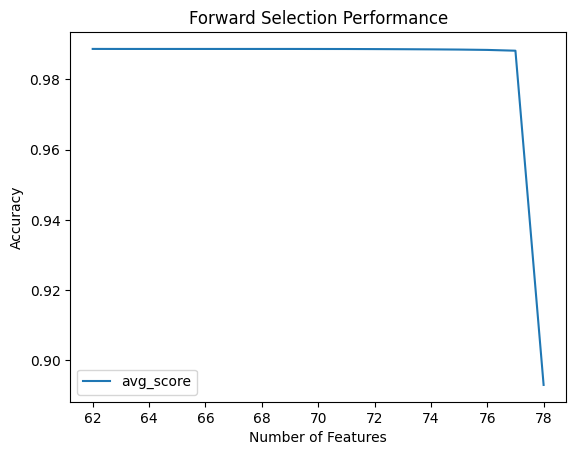

In [13]:
# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print('Accuracy:', accuracy)

# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df['avg_score'] = sfs_df['avg_score'].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind='line', y='avg_score', ax=ax)
ax.set_xlabel('Number of Features')
ax.set_ylabel('Accuracy')
ax.set_title('Forward Selection Performance')
plt.show()

In [14]:
# Filter columns based on the selected features list
df_selected = df[[col for col in df.columns if col in list(sfs.k_feature_names_)]]

(df_selected) 

,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,...,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Max,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,0.504694,...,0.125015,0.474380,0.000052,0.454545,0.001253,0.004293,0.083017,0.001615,0.083439,0.081228
1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,0.000015,...,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,0.967061,...,0.000000,0.007950,0.000046,0.000000,0.000618,0.003237,0.080068,0.021086,0.083531,0.043356
3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,0.036977,...,0.000000,0.003235,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,0.015704,...,0.125015,0.959061,0.000033,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,0.999977,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,0.000320,...,0.000000,0.500015,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
172005,0.999983,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,0.000113,...,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
172006,0.999988,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,0.000010,...,0.000000,0.500015,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
172007,0.999994,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,0.976377,...,0.125015,0.002701,0.000039,0.454545,0.003830,0.006237,0.484363,0.000647,0.484614,0.484112


In [15]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,172004,0.999977,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172005,172005,0.999983,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
172006,172006,0.999988,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172007,172007,0.999994,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,...,0.454545,0.003830,0.004991,0.006237,0.001424,0.484363,0.000647,0.484614,0.484112,1


In [16]:
df_selected.to_csv("BackwardSelection.csv")